# 🐧 Penguin Clustering Analysis

This notebook performs clustering analysis on the Palmer Penguins dataset using both hierarchical and K-Means methods. The goal is to identify natural groupings based on physical characteristics and evaluate their alignment with known species and islands.


## 📦 Imports and Setup

In [9]:
# Import necessary libraries
import os
import pandas as pd    
import seaborn as sns  
import matplotlib.pyplot as plt  
import numpy as np
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style='whitegrid')

## 📊 Data Loading and Preprocessing

In [2]:
# Load the dataset
df = pd.read_excel('../data/penguins.xlsx')

In [3]:
# Separate numerical and categorical features
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_features = ['species', 'island', 'sex']

In [4]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_features])

## 🔍 Exploratory Data Analysis

In [5]:
# Display basic statistics
df[numerical_features].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


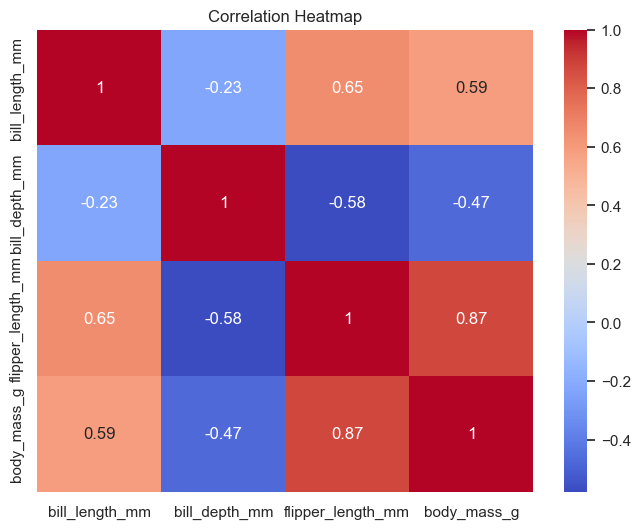

In [6]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 🧬 Hierarchical Clustering

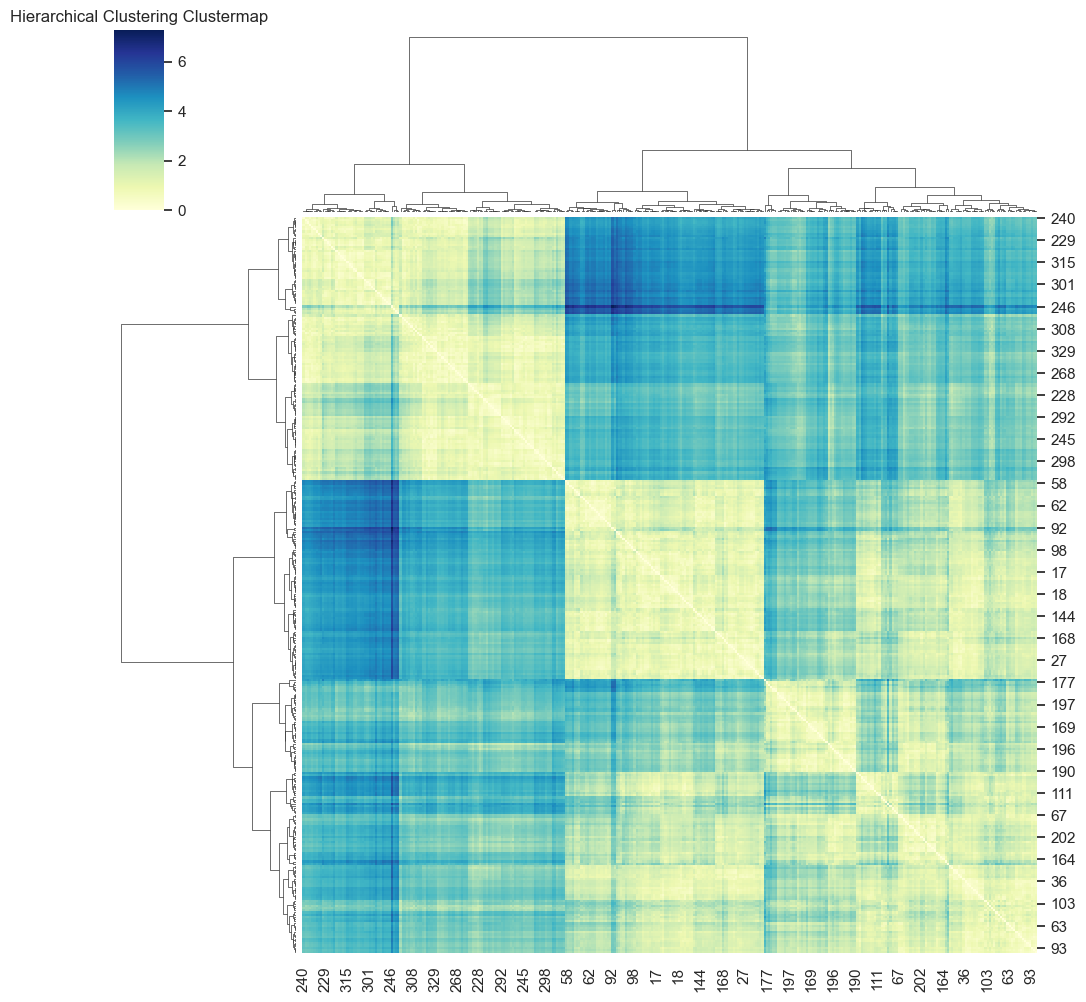

In [7]:
# Compute Euclidean distance matrix using cdist
distance_matrix = distance.cdist(X_scaled, X_scaled, metric='euclidean')

# Plot clustermap using seaborn
linkage_rep = sns.clustermap(
    distance_matrix, 
    cmap="YlGnBu",
    fmt=".1f", 
    annot=False, 
    method='ward'
    ).dendrogram_row
plt.title('Hierarchical Clustering Clustermap')
plt.show()

The clustermap suggests two to four clusters as possible choices, considering the main blocks. 

In [ ]:
# Compute Euclidean distance matrix (condensed form)
distance_matrix = pdist(X_scaled, metric='euclidean')

# Generate linkage matrix
linkage_matrix = linkage(distance_matrix, method='ward')

# Assign cluster labels (with 2 clusters)
hierarchical_labels = fcluster(linkage_matrix, t=2, criterion='maxclust')

## 🎯 K-Means Clustering

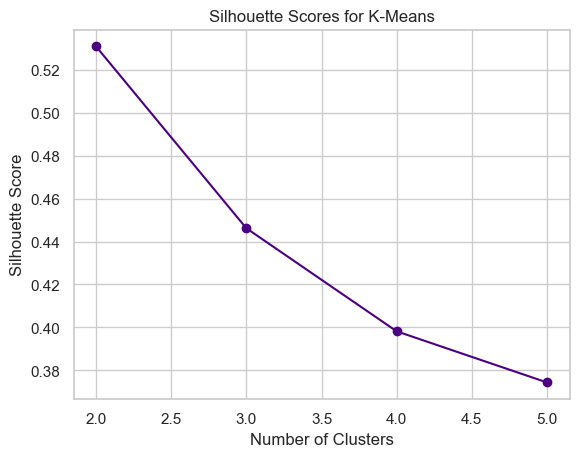

In [13]:
# Determine optimal k using silhouette scores
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
plt.plot(range(2, 6), silhouette_scores, marker='o', color='indigo')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

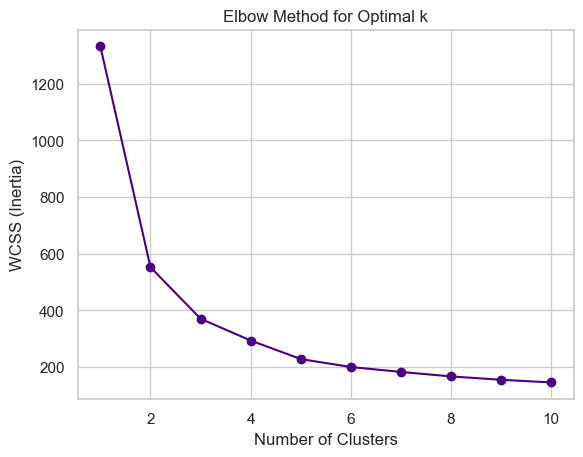

In [15]:
# Determine optimal k using the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', color='indigo')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

After analyzing both methods, k=2 seems like the best choice. It has the highest silhouette score, indicating well-separated clusters, while the elbow plot shows a clear "elbow" at the same number of clusters, where the WCSS drops sharply and then continues to slowly decrease.

In [17]:
# Fit K-Means with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

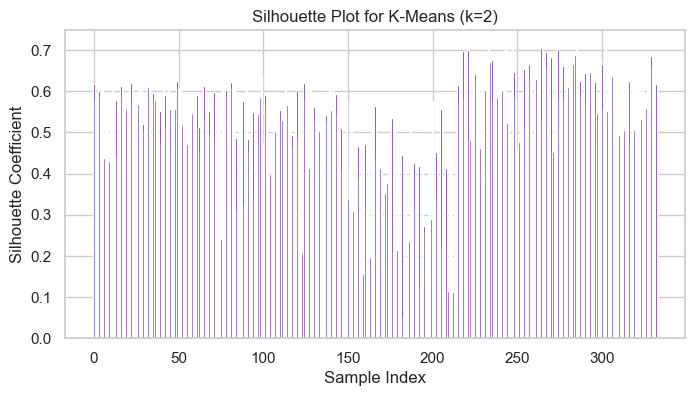

In [20]:
# Evaluation of labels: Silhouette plot for k=2
silhouette_vals = silhouette_samples(X_scaled, kmeans_labels)
plt.figure(figsize=(8, 4))
plt.bar(range(len(silhouette_vals)), silhouette_vals, color='indigo')
plt.title('Silhouette Plot for K-Means (k=2)')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Coefficient')
plt.show()

Most sample have high silhouette coefficients, indicating that the clusters are well-separated. 

## 🧩 Supplementary Variable Analysis

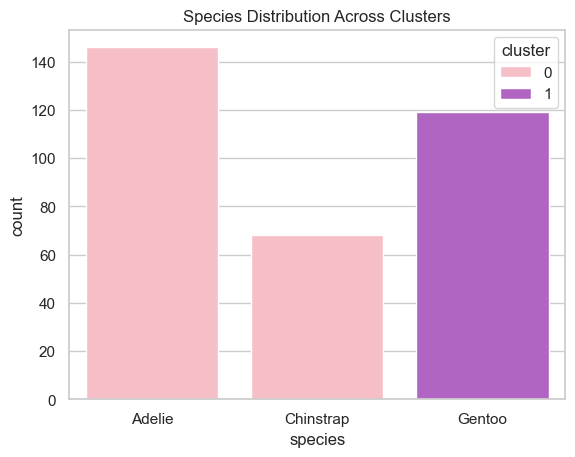

In [24]:
# Add cluster labels to the original dataframe
df['cluster'] = kmeans_labels

# Plot species vs clusters
personalized_pallete = ['#FFB6C1', '#BA55D3']  # light pink, medium orchid
sns.countplot(data=df, x='species', hue='cluster',palette=personalized_pallete)
plt.title('Species Distribution Across Clusters')
plt.show()

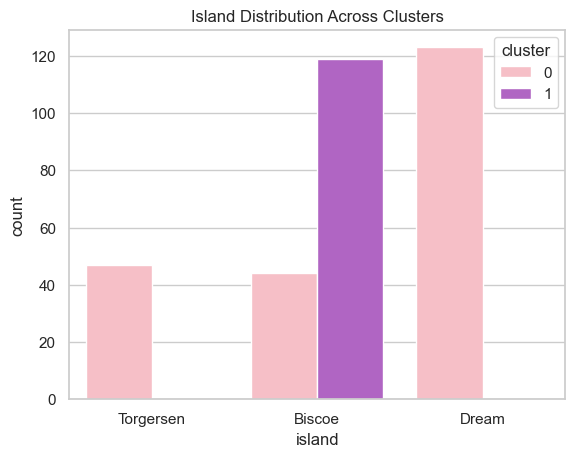

In [25]:
# Plot island vs clusters
sns.countplot(data=df, x='island', hue='cluster', palette=personalized_pallete)
plt.title('Island Distribution Across Clusters')
plt.show()

## ✅ Conclusions
- K-Means with k=2 provided the best clustering performance.
- Clusters aligned well with species and island categories.
- The analysis highlights the effectiveness of unsupervised learning in biological data exploration.